## I. Introduction to the Problem and Dataset

In [1]:
print("Hello World!")

Hello World!


## II. Description of the dataset

## III. List of requirements

In [2]:
# Constants
dataset_path = 'Dataset 2 - Garments Dataset/garments.csv'
random_seed = 69

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Training and Testing the model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# Models
from sklearn.neural_network import MLPRegressor

# Load the dataset from Dataset folder
og_df = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)

C:\Users\Rapha\AppData\Local\Temp\ipykernel_7608\1149638224.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## IV. Data Preprocessing and Cleaning


In [4]:
# check for NaN values
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [5]:
# change all the NaN values to 0
df = df.fillna(0)

In [6]:
# check department column
print(df['department'].unique())

# change all 'finishing ' to 'finishing'
df['department'] = df['department'].replace('finishing ', 'finishing')
df['department'] = df['department'].replace('sweing', 'sewing')
print(df['department'].unique())

['sweing' 'finishing ' 'finishing']
['sewing' 'finishing']


In [7]:
#check datatypes for all columns
print(df.dtypes)

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [8]:
print(df['department'].value_counts())

department
sewing       691
finishing    506
Name: count, dtype: int64


In [9]:
print(df['quarter'].value_counts())

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


In [10]:
print(df['day'].value_counts())

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


In [11]:
print(df['team'].value_counts())

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64


In [12]:
print(df['targeted_productivity'].value_counts())

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64


In [13]:
print(df['smv'].value_counts())

smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: count, Length: 70, dtype: int64


In [14]:
print(df['wip'].value_counts())

wip
0.0       506
1039.0      5
1282.0      4
1422.0      3
1216.0      3
         ... 
1635.0      1
1519.0      1
1337.0      1
1118.0      1
914.0       1
Name: count, Length: 549, dtype: int64


In [15]:
# get all rows with 0 wip
print(df[df['wip'] == 0])

           date   quarter department        day  team  targeted_productivity  \
1      1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
6      1/1/2015  Quarter1  finishing   Thursday     2                   0.75   
13     1/1/2015  Quarter1  finishing   Thursday    10                   0.65   
14     1/1/2015  Quarter1  finishing   Thursday     8                   0.75   
15     1/1/2015  Quarter1  finishing   Thursday     4                   0.75   
...         ...       ...        ...        ...   ...                    ...   
1192  3/11/2015  Quarter2  finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2  finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2  finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2  finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2  finishing  Wednesday     6                   0.70   

       smv  wip  over_time  incentive  

In [16]:
print(df['over_time'].value_counts())

over_time
960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: count, Length: 143, dtype: int64


In [17]:
# print incentives with less than 0 
print(df[df['incentive'] < 0])

Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


In [18]:
print(df['idle_time'].value_counts())

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64


In [19]:
print(df['idle_men'].value_counts())

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: count, dtype: int64


In [20]:
print(df['no_of_style_change'].value_counts())

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64


In [21]:
print(df['no_of_workers'].head())
# round down the no_of_workers
df['no_of_workers'] = np.floor(df['no_of_workers'])
print(df['no_of_workers'].head())

0    59.0
1     8.0
2    30.5
3    30.5
4    56.0
Name: no_of_workers, dtype: float64
0    59.0
1     8.0
2    30.0
3    30.0
4    56.0
Name: no_of_workers, dtype: float64


In [22]:
print(df['actual_productivity'].value_counts())
# print actual_productivity where it is < 0 or > 1
print(df[(df['actual_productivity'] < 0) | (df['actual_productivity'] > 1)])

actual_productivity
0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: count, Length: 879, dtype: int64
          date   quarter department        day  team  targeted_productivity  \
337  1/20/2015  Quarter3  finishing    Tuesday     5                   0.70   
437  1/26/2015  Quarter4  finishing     Monday     3                   0.75   
456  1/27/2015  Quarter4     sewing    Tuesday     2                   0.75   
457  1/27/2015  Quarter4     sewing    Tuesday     3                   0.75   
477  1/28/2015  Quarter4     sewing  Wednesday     2                   0.80   
478  1/28/2015  Quarter4     sewing  Wednesday     3                   0.80   
498  1/29/2015  Quarter5     sewing   Thursday     2                   0.80   
518  1/31/2015  Quarter5     sewing   Saturday     3                   0.80   
519  1/31/2015  Quarter5     sewing   Saturday     2             

In [23]:
# round down the actual_productivity if it is > 1
df['actual_productivity'] = np.where(df['actual_productivity'] > 1, 1, df['actual_productivity'])
print(df[(df['actual_productivity'] < 0) | (df['actual_productivity'] > 1)])

Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


In [24]:
#drop date
df = df.drop('date', axis=1)

In [25]:
# check for duplicates
print(df.duplicated().sum())

0


In [26]:
#check if any numerical value is less than 0
print(df[(df.select_dtypes(include=[np.number]) < 0).any(axis=1)])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


In [27]:
# print all datatypes
print(df.dtypes)

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [28]:
# calculate overtime per worker
df['overtime_per_worker'] = df['over_time'] / df['no_of_workers']
print(df[df['overtime_per_worker'] > 120].shape)
print(df[df['overtime_per_worker'] > 240].shape)
print(df[df['overtime_per_worker'] > 420].shape)
print(df[df['overtime_per_worker'] > 600].shape)

(490, 15)
(70, 15)
(16, 15)
(2, 15)


In [29]:
# print all idle_men with decimal values
print(df[df['idle_men'] % 1 != 0])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity, overtime_per_worker]
Index: []


In [30]:
#print all rows with idle time = 0 and idle_men > 0
print(df[(df['idle_time'] == 0) & (df['idle_men'] > 0)])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity, overtime_per_worker]
Index: []


In [31]:
# turn department, day, and quarter into one-hot encoding
df = pd.get_dummies(df, columns=['department', 'day', 'quarter'])
# print all datatypes
print(df.dtypes)

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
overtime_per_worker      float64
department_finishing        bool
department_sewing           bool
day_Monday                  bool
day_Saturday                bool
day_Sunday                  bool
day_Thursday                bool
day_Tuesday                 bool
day_Wednesday               bool
quarter_Quarter1            bool
quarter_Quarter2            bool
quarter_Quarter3            bool
quarter_Quarter4            bool
quarter_Quarter5            bool
dtype: object


In [32]:
#check for days where there are no incentives but have overtime (trim to targeted_productivity, idle_men, idle_time, and actual_productivity)
print(df[(df['incentive'] == 0) & (df['over_time'] > 0)][['targeted_productivity', 'idle_men', 'idle_time', 'actual_productivity', 'incentive', 'over_time', 'wip', 'smv']])

# TODO SOMETHING HERE

      targeted_productivity  idle_men  idle_time  actual_productivity  \
1                      0.75         0        0.0             0.886500   
6                      0.75         0        0.0             0.755167   
13                     0.65         0        0.0             0.705917   
14                     0.75         0        0.0             0.676667   
15                     0.75         0        0.0             0.593056   
...                     ...       ...        ...                  ...   
1192                   0.75         0        0.0             0.628333   
1193                   0.70         0        0.0             0.625625   
1194                   0.65         0        0.0             0.625625   
1195                   0.75         0        0.0             0.505889   
1196                   0.70         0        0.0             0.394722   

      incentive  over_time  wip   smv  
1             0        960  0.0  3.94  
6             0        960  0.0  3.94  
13 

In [33]:
#check overtime and incentive relationship
print(df[(df['incentive'] > 0) & (df['over_time'] > 0)][['targeted_productivity', 'idle_men', 'idle_time', 'actual_productivity', 'incentive', 'over_time', 'wip', 'smv']])

      targeted_productivity  idle_men  idle_time  actual_productivity  \
0                      0.80         0        0.0             0.940725   
2                      0.80         0        0.0             0.800570   
3                      0.80         0        0.0             0.800570   
4                      0.80         0        0.0             0.800382   
5                      0.80         0        0.0             0.800125   
...                     ...       ...        ...                  ...   
1187                   0.75         0        0.0             0.750051   
1188                   0.70         0        0.0             0.700557   
1189                   0.70         0        0.0             0.700505   
1190                   0.70         0        0.0             0.700246   
1191                   0.65         0        0.0             0.650596   

      incentive  over_time     wip    smv  
0            98       7080  1108.0  26.16  
2            50       3660   968.0 

In [34]:
#check cleaned dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   incentive              1197 non-null   int64  
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  overtime_per_worker    1197 non-null   float64
 12  department_finishing   1197 non-null   bool   
 13  department_sewing      1197 non-null   bool   
 14  day_Monday             1197 non-null   bool   
 15  day_

# V. Exploratory Data Analysis

## V-A. <EDA 1> (Seal)

## V-B. <EDA 2> (Orrin)

## V-C. Day of the Week and Quarter of the Month to Actual Productivity (Tean)

### Description

In the Philippines, a company typically pays its workers at the end of the 2nd and 4th week of every month. With this, it can be speculated that the actual productivity of the workers will be affected when in the proximity of those times as they anticipate receiving their paychecks. Additionally, with the chosen representation, it will also be possible to analyze actual productivity as the month goes by.

Relevant fields of the EDA:

Days of the Week:
- 'day_Monday'
- 'day_Tuesday'
- 'day_Wednesday'
- 'day_Thursday'
- 'day_Saturday'
- 'day_Sunday'

Quarters of the Month:
- 'quarter_Quarter1'
- 'quarter_Quarter2'
- 'quarter_Quarter3'
- 'quarter_Quarter4'
- 'quarter_Quarter5'

Actual Productivity:
- 'actual_productivity'

### Data Transformation

Seclude the relevant fields for the EDA.

In [36]:
day_quarter_productivity_df = df[['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'actual_productivity']]

day_quarter_productivity_df

,day_Monday,day_Tuesday,day_Wednesday,day_Thursday,day_Saturday,day_Sunday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,actual_productivity
0,False,False,False,True,False,False,True,False,False,False,False,0.940725
1,False,False,False,True,False,False,True,False,False,False,False,0.886500
2,False,False,False,True,False,False,True,False,False,False,False,0.800570
3,False,False,False,True,False,False,True,False,False,False,False,0.800570
4,False,False,False,True,False,False,True,False,False,False,False,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,False,False,True,False,False,False,False,True,False,False,False,0.628333
1193,False,False,True,False,False,False,False,True,False,False,False,0.625625
1194,False,False,True,False,False,False,False,True,False,False,False,0.625625
1195,False,False,True,False,False,False,False,True,False,False,False,0.505889


Transform the relevant fields into more easily processable values.

In [37]:
# Ensure we are working with a copy of the DataFrame
day_quarter_productivity_df = day_quarter_productivity_df.copy()

# Make day_of_week and quarter columns
day_quarter_productivity_df.loc[:, 'day_of_week'] = day_quarter_productivity_df[['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday']].idxmax(axis=1).str.split('_').str[1]
day_quarter_productivity_df.loc[:, 'quarter'] = day_quarter_productivity_df[['quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5']].idxmax(axis=1).str.split('_').str[1]

# Drop the one-hot encoded columns
day_quarter_productivity_df = day_quarter_productivity_df.drop(['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5'], axis=1)

day_quarter_productivity_df

,actual_productivity,day_of_week,quarter
0,0.940725,Thursday,Quarter1
1,0.886500,Thursday,Quarter1
2,0.800570,Thursday,Quarter1
3,0.800570,Thursday,Quarter1
4,0.800382,Thursday,Quarter1
...,...,...,...
1192,0.628333,Wednesday,Quarter2
1193,0.625625,Wednesday,Quarter2
1194,0.625625,Wednesday,Quarter2
1195,0.505889,Wednesday,Quarter2


### Data Representation and Visualization

Pivot Tables specialize in representing grouped data of many dimensions into a neat table format, where the rows and columns are the groupings and the cells are the featured values.
As the EDA features 1 quantitative and 2 qualitative features, a Pivot Table should be the most fitting representation. 
This lets us create a table who's columns are the days of the week, rows are the quarters of the month, and cells are the means of the actual productivities grouped by the columns and rows.

In [38]:
# Create a pivot table
pivot_table = day_quarter_productivity_df.pivot_table(
    values='actual_productivity', 
    index='quarter', 
    columns='day_of_week', 
    aggfunc='mean'
)

# Sort the days of the week
pivot_table = pivot_table[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday']]

pivot_table

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Saturday
quarter,,,,,,
Quarter1,0.744070,0.746133,0.751094,0.755135,0.749143,0.761843
Quarter2,0.748086,0.739473,0.760480,0.738996,0.719283,0.741212
Quarter3,0.677855,0.706273,0.700208,0.695238,0.722660,0.730730
Quarter4,0.716707,0.737127,0.737412,0.712093,0.654613,0.700899
Quarter5,NaN,NaN,NaN,NaN,0.791633,0.854926


To better visualize the Pivot Table, a Heat Map can be made to highlight the trends of the data in each grouping.

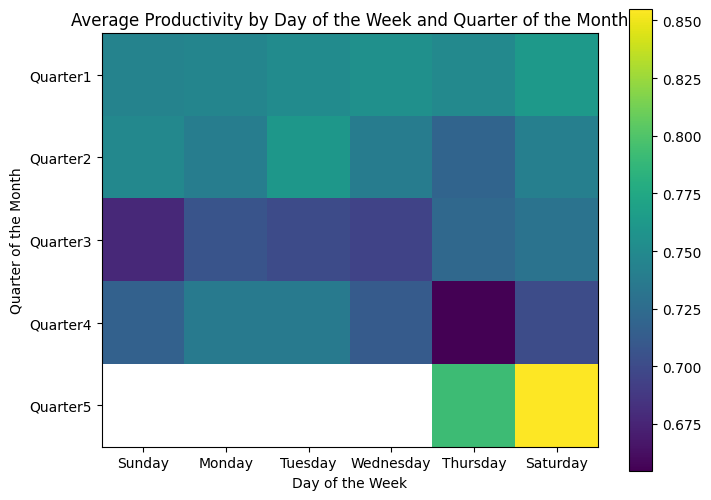

In [39]:
# Plot the pivot table
plt.figure(figsize=(8, 6))
plt.imshow(pivot_table, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(6), pivot_table.columns)
plt.yticks(np.arange(5), pivot_table.index)
plt.xlabel('Day of the Week')
plt.ylabel('Quarter of the Month')
plt.title('Average Productivity by Day of the Week and Quarter of the Month')
plt.show()

### Findings

- Actual productivity of workers decreases as the month goes by, with the later half of the month being darker than the start. 
- The start of Quarter 3 (0.677855) and the end of Quarter 4 (0.654613) are especially dark, suggesting that the workers are less productive after receiving their 1st monthly paycheck and before receiving their 2nd monthly paycheck.
- Quarter 5 is very productive as its colors are way brighter. However, this may be an outlier due to the only Quarter 5 days being 1/29/2015 (0.791633) and 1/31/2025 (0.854926).

## V-D. SMV to Number of Workers and Overtime

In [35]:
smv_nw_overtime_df = df[['smv', 'no_of_workers', 'over_time']]

# VI. Initial Model Training

## VI-0. Train, Validation, and Test Set Separation

`X` is the feature table and will all features except `actual_productivity`.

`y` is the label of the feature table and will only contain `actual_productivity`.

In [40]:
X = df.drop(columns=['actual_productivity']).values
y = df['actual_productivity'].values

print('X ', X.shape)
print('y ', y.shape)

X  (1197, 24)
y  (1197,)


Divide the dataset into train and test sets, where `20%` of the data will be placed in the test set.

Divide the train set into train and validation sets, where `10%` of the data will be placed in the validation set. 

Random state is set to `69` for uniformity.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_seed)

Display the shape of the train, validation, and test sets.

In [42]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_val', X_val.shape)
print('y_val', y_val.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (861, 24)
y_train (861,)
X_val (96, 24)
y_val (96,)
X_test (240, 24)
y_test (240,)


## VI-A. Linear Regression

## VI-B. Decision Trees

## VI-C. Neural Network

Justification...

In [43]:
nn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(hidden_layer_sizes=(250, 250, 250), random_state=random_seed))
])

Default Hyperparameters

Note: There is only 1 hidden layer

In [44]:
nn_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor',
   MLPRegressor(hidden_layer_sizes=(250, 250, 250), random_state=69))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': MLPRegressor(hidden_layer_sizes=(250, 250, 250), random_state=69),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__activation': 'relu',
 'regressor__alpha': 0.0001,
 'regressor__batch_size': 'auto',
 'regressor__beta_1': 0.9,
 'regressor__beta_2': 0.999,
 'regressor__early_stopping': False,
 'regressor__epsilon': 1e-08,
 'regressor__hidden_layer_sizes': (250, 250, 250),
 'regressor__learning_rate': 'constant',
 'regressor__learning_rate_init': 0.001,
 'regressor__max_fun': 15000,
 'regressor__max_iter': 200,
 'regressor__momentum': 0.9,
 'regressor__n_iter_no_change': 10,
 'regressor__nesterovs_momentum': True,
 'regressor__power_t': 0.5,
 'regressor__random_state': 69,
 'regressor__shuffle': True,
 'regressor__solver': 'adam',
 'regressor

In [45]:
nn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(250, 250, 250),
                              random_state=69))])

In [46]:
nn_train_score = nn_pipe.score(X_train, y_train)
nn_val_score = nn_pipe.score(X_val, y_val)
nn_test_score = nn_pipe.score(X_test, y_test)

print('Initial Neural Network Train Score:', nn_train_score)
print('Initial Neural Network Validation Score:', nn_val_score)
print('Initial Neural Network Test Score:', nn_test_score)

Initial Neural Network Train Score: 0.8647183733420212
Initial Neural Network Validation Score: 0.3674955162786705
Initial Neural Network Test Score: 0.014024415515057176


# VII. Error Analysis

## VII-A. Linear Regression

## VII-B. Decision Trees

## VII-C. Neural Network

# VIII. Improving Model Performance

## VIII-A. Linear Regression

## VIII-B. Decision Trees

## VIII-C. Neural Network

In [53]:
nn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(random_state=random_seed))
])

In [61]:
# Define hidden layer sizes
neuron_options = [50, 100, 250, 500]
max_layers = 10

hidden_layer_sizes = []
for num_layers in range(1, max_layers + 1):
    for combination in itertools.product(neuron_options, repeat=num_layers):
        hidden_layer_sizes.append(combination)

In [62]:
nn_hyperparameters = [
    {
        'regressor__hidden_layer_sizes': hidden_layer_sizes,
        'regressor__activation': ['logistic', 'tanh', 'relu'],      
        'regressor__learning_rate': ['constant', 'invscaling', 'adaptive'],
        'regressor__learning_rate_init': [0.1, 0.01, 0.001, 0.0001],
        'regressor__max_iter': [200, 400, 600, 800, 1000],
        'regressor__alpha': [0.0001, 0.001, 0.01, 0.1]
    }
]

In [63]:
nn_rscv = RandomizedSearchCV(nn_pipe, nn_hyperparameters, n_iter=50, cv=5, n_jobs=5, random_state=random_seed)
nn_rscv.fit(X_train, y_train)

C:\Users\Tean Concio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('regressor',
                                              MLPRegressor(random_state=69))]),
                   n_iter=50, n_jobs=5,
                   param_distributions=[{'regressor__activation': ['logistic',
                                                                   'tanh',
                                                                   'relu'],
                                         'regressor__alpha': [0.0001, 0.001,
                                                              0.01, 0.1],
                                         'regressor__hidden_layer_sizes': [(50,),
                                                                           (100,),
                                                                           (250,),
                                                                           (500,),
                                                                           (50,
                                                                            50),
                                                                           (50,
                                                                            100),
                                                                           (50,
                                                                            250),
                                                                           (50,
                                                                            5...
                                                                           (500,
                                                                            50),
                                                                           (500,
                                                                            100),
                                                                           (500,
                                                                            250),
                                                                           (500,
                                                                            500),
                                                                           (50,
                                                                            50,
                                                                            50),
                                                                           (50,
                                                                            50,
                                                                            100),
                                                                           (50,
                                                                            50,
                                                                            250),
                                                                           (50,
                                                                            50,
                                                                            500),
                                                                           (50,
                                                                            100,
                                                                            50),
                                                                           (50,
                                                                            100,
                                                                            100),
                                                                           (50,
                                                                            100,
                                                                            250),
                 

In [64]:
nn_train_score = nn_rscv.score(X_train, y_train)
nn_val_score = nn_rscv.score(X_val, y_val)
nn_test_score = nn_rscv.score(X_test, y_test)

print('Tuned Neural Network Train Score:', nn_train_score)
print('Tuned Neural Network Validation Score:', nn_val_score)
print('Tuned Neural Network Test Score:', nn_test_score)

Tuned Neural Network Train Score: 0.45795263992474067
Tuned Neural Network Validation Score: 0.44399489365376277
Tuned Neural Network Test Score: 0.21405551428987302


In [65]:
nn_rscv.best_params_

{'regressor__max_iter': 400,
 'regressor__learning_rate_init': 0.001,
 'regressor__learning_rate': 'adaptive',
 'regressor__hidden_layer_sizes': (250,
  250,
  500,
  250,
  100,
  100,
  500,
  100,
  250,
  250),
 'regressor__alpha': 0.1,
 'regressor__activation': 'tanh'}

# IX. Model Performance Summary

## IX-A. Linear Regression

## IX-B. Decision Trees

## IX-C. Neural Network

# X. Insights and Conclusions

# XI. References